In [16]:
%run notebook_utils.py
%run gridsearch_utils.py

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

%cd ..
from langid import WrappedVectorizer, sanitize, np_sanitize
%cd - 

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


In [2]:
# set big font in plots
SMALL_SIZE = 18
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [4]:
# load data
X_train, X_test, y_train, y_test = load_split_data()
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

In [5]:
# sanitize once 
X_train = np_sanitize(X_train)
X_test = np_sanitize(X_test)
sms_any_X = np_sanitize(sms_any_X)
X_valid = np_sanitize(X_valid)

# A simple MultinomialNB

In [51]:
vec_params = dict(analyzer='char', ngram_range=(3,3), smooth_idf=True, use_idf=True)

In [52]:
pipe = Pipeline(steps=[
    ('vec', TfidfVectorizer(**vec_params, max_features=6000)),
    ('clf', MultinomialNB())
])

_ = pipe.fit(X_train, y_train)

TEST SET
             precision    recall  f1-score   support

         de     0.9674    0.9932    0.9801      1462
         fr     0.9946    0.9966    0.9956      1468
         en     0.9884    0.9974    0.9929      1538
         it     0.9900    0.9993    0.9946      1482
         sg     0.9963    0.9478    0.9715      1438

avg / total     0.9873    0.9871    0.9871      7388



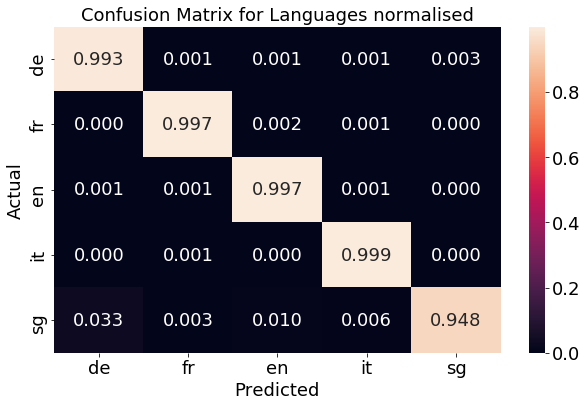

SMS RECALL
total samples    10692
total errors       324 (3.03%)
---------------------------------
languages detected
    de      229
    fr       17
    en       42
    it       36
    sg    10368


VALIDATION SET
             precision    recall  f1-score   support

         de     0.9355    0.9935    0.9636      2613
         fr     0.9985    0.9962    0.9973      2613
         en     0.9905    0.9992    0.9949      2613
         it     0.9958    0.9977    0.9968      2613
         sg     0.9975    0.9273    0.9611      2613

avg / total     0.9836    0.9828    0.9827     13065



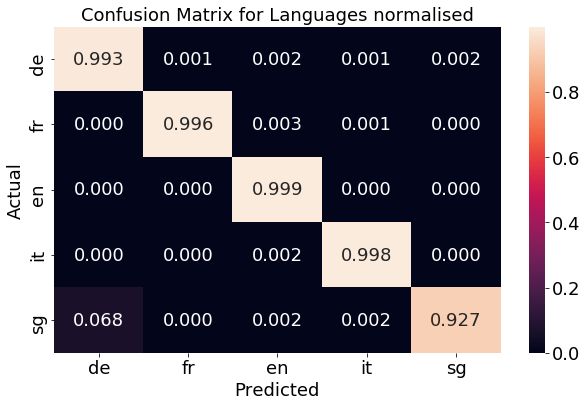

In [53]:
print("TEST SET")
print("========")
y_pred = pipe.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

# Using raw frequencies as features

In [39]:
pipe2 = Pipeline(steps=[
    ('vec', CountVectorizer(ngram_range=(1, 3), max_features=10000)),
    ('clf', MultinomialNB())
])

pipe2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

TEST SET
             precision    recall  f1-score   support

         de     0.9785    0.9966    0.9875      1462
         fr     0.9939    1.0000    0.9969      1468
         en     0.9942    0.9987    0.9964      1538
         it     0.9973    0.9993    0.9983      1482
         sg     0.9957    0.9638    0.9795      1438

avg / total     0.9919    0.9919    0.9918      7388



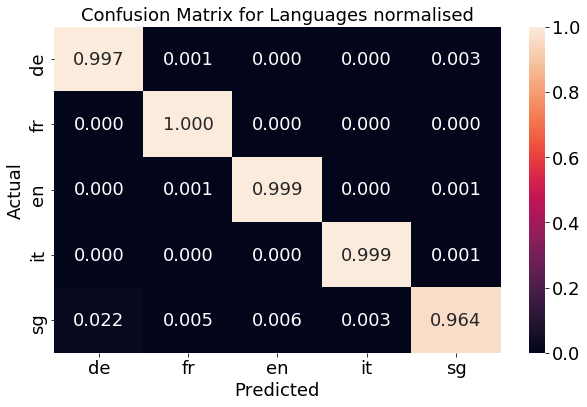

SMS RECALL
total samples    10692
total errors       221 (2.07%)
---------------------------------
languages detected
    de       95
    fr       58
    en       48
    it       20
    sg    10471


VALIDATION SET
             precision    recall  f1-score   support

         de     0.9490    0.9969    0.9724      2613
         fr     0.9977    0.9985    0.9981      2613
         en     0.9973    1.0000    0.9987      2613
         it     0.9969    0.9989    0.9979      2613
         sg     0.9972    0.9414    0.9685      2613

avg / total     0.9876    0.9871    0.9871     13065



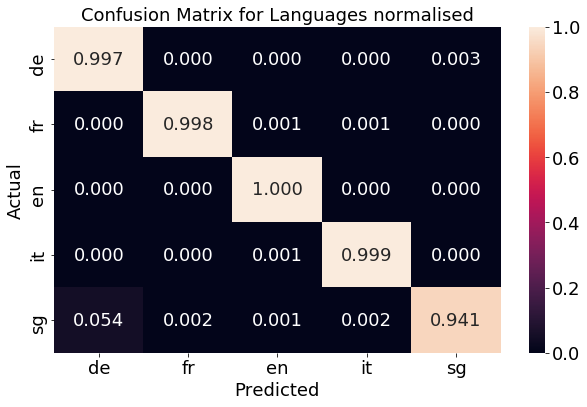

In [40]:
print("TEST SET")
print("========")
y_pred = pipe2.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(pipe2)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = pipe2.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)